**outlier**   
An outlier in data is a value that differs significantly from the other values in a dataset.

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
dataset = pd.read_csv('student_per.csv')
dataset.head(5)

,student_id,weekly_self_study_hours,attendance_percentage,class_participation,total_score,grade
0,1,18.5,95.6,3.8,97.9,A
1,2,14.0,80.0,2.5,83.9,B
2,3,19.5,86.3,5.3,100.0,A
3,4,25.7,70.2,7.0,100.0,A
4,5,13.4,81.9,6.9,92.0,A


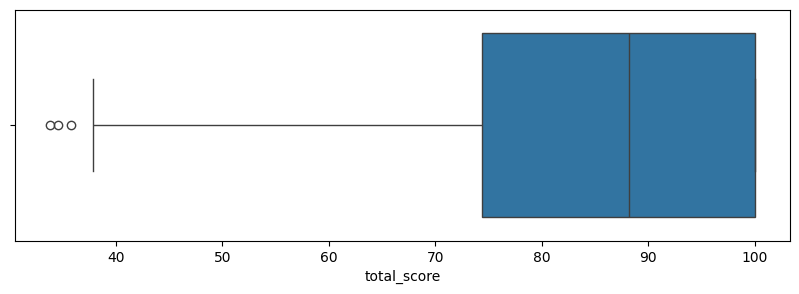

In [13]:
plt.figure(figsize=(10,3))
sns.boxplot(x='total_score',data = dataset)
plt.show()

C:\Users\Acer\AppData\Local\Temp\ipykernel_6552\3509188810.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['total_score'])


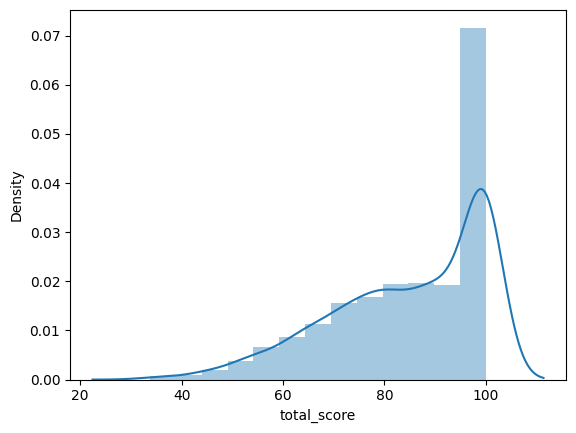

In [14]:
sns.distplot(dataset['total_score'])
plt.show()

One of the most common ways to detect and remove outliers in a dataset is using the IQR (Interquartile Range) method. Here’s a clear explanation with steps       
**What is IQR?**

Q1 (25th percentile): value below which 25% of the data fall   
Q3 (75th percentile): value below which 75% of the data fall   

IQR = Q3 − Q1   

Outliers are considered as values far from Q1 and Q3, specifically:   
Lower bound=Q1−1.5×IQR   
Upper bound =Q3+1.5×IQR   

Any data point below the lower bound or above the upper bound is treated as an outlier.   

In [19]:
dataset.describe()

,student_id,weekly_self_study_hours,attendance_percentage,class_participation,total_score
count,998.000000,998.000000,998.000000,998.000000,998.000000
mean,499.500000,15.159519,84.712525,5.972545,84.732265
std,288.242086,6.789205,9.364931,1.908968,15.064447
min,1.000000,0.000000,50.000000,0.000000,33.800000
25%,250.250000,10.425000,78.200000,4.700000,74.400000
50%,499.500000,15.200000,85.000000,6.000000,88.200000
75%,748.750000,19.500000,91.700000,7.200000,100.000000
max,998.000000,40.000000,100.000000,10.000000,100.000000


In [20]:
Q1 = dataset['total_score'].quantile(0.25)
Q3 = dataset['total_score'].quantile(0.75)
IQR = Q3-Q1
Q1,Q3,IQR

(np.float64(74.4), np.float64(100.0), np.float64(25.599999999999994))

In [21]:
max_range = Q1+IQR*1.5
min_range = Q1-IQR*1.5
min_range,max_range

(np.float64(36.000000000000014), np.float64(112.8))

In [42]:
new_data = dataset[dataset['total_score']>min_range]
new_data.shape

(995, 6)

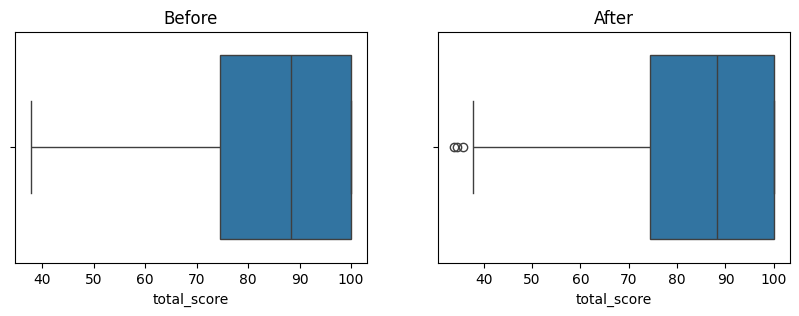

In [40]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.title('Before')
sns.boxplot(x='total_score',data=new_data)

plt.subplot(1,2,2)
plt.title('After')
sns.boxplot(x='total_score',data = dataset)
plt.show()

In [47]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   student_id               998 non-null    int64  
 1   weekly_self_study_hours  998 non-null    float64
 2   attendance_percentage    998 non-null    float64
 3   class_participation      998 non-null    float64
 4   total_score              998 non-null    float64
 5   grade                    998 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 46.9+ KB


In [49]:
dataset['total_score']= dataset['total_score'].astype('int')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   student_id               998 non-null    int64  
 1   weekly_self_study_hours  998 non-null    float64
 2   attendance_percentage    998 non-null    float64
 3   class_participation      998 non-null    float64
 4   total_score              998 non-null    int64  
 5   grade                    998 non-null    object 
dtypes: float64(3), int64(2), object(1)
memory usage: 46.9+ KB


In [56]:
min_range2 = dataset["total_score"].mean() - 3 * dataset["total_score"].std()
max_range2= dataset["total_score"].mean() + 3 * dataset["total_score"].std()

min_range, max_range

(np.float64(38.83771784982101), np.float64(129.97390539667197))

In [57]:
new_data2 = dataset[dataset['total_score']>min_range2]
new_data2.shape

(993, 6)

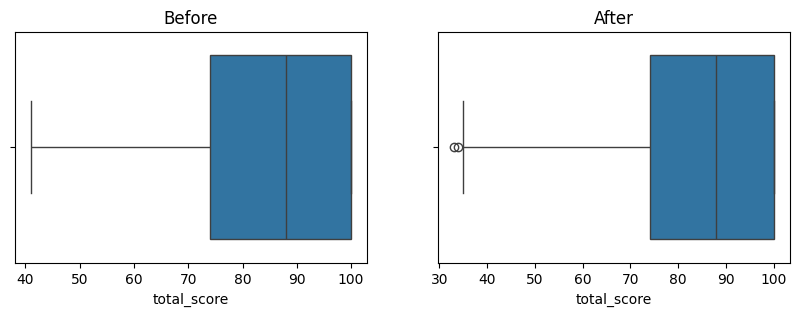

In [58]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.title('Before')
sns.boxplot(x='total_score',data=new_data2)

plt.subplot(1,2,2)
plt.title('After')
sns.boxplot(x='total_score',data = dataset)
plt.show()